In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('supply_chain_exceptions.csv')

# Display the first few rows to verify data loaded correctly
print(df.head())


  Shipment_ID        Date Vendor_Name Product_Category Region  \
0     SHP1000  2023-04-13   OceanLink        Furniture   East   
1     SHP1001  2023-05-02  AlphaLogix  Pharmaceuticals  South   
2     SHP1002  2023-12-26  AlphaLogix        Furniture  North   
3     SHP1003  2023-10-04   OceanLink  Pharmaceuticals  North   
4     SHP1004  2023-09-10   MetroMove          Apparel   East   

   Planned_Delivery_Days  Actual_Delivery_Days Delay_Flag     Delay_Reason  \
0                      5                     5         No             None   
1                      4                    12        Yes   Labor Shortage   
2                      9                     9         No             None   
3                      2                     2         No             None   
4                     13                    16        Yes  Port Congestion   

   Forecast_Units  Actual_Units_Shipped  Forecast_Error_Percent  \
0             206                   225                    9.22   
1     

In [4]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())



Shipment_ID               0
Date                      0
Vendor_Name               0
Product_Category          0
Region                    0
Planned_Delivery_Days     0
Actual_Delivery_Days      0
Delay_Flag                0
Delay_Reason              0
Forecast_Units            0
Actual_Units_Shipped      0
Forecast_Error_Percent    0
Damage_Reported           0
Cost_Impact_USD           0
dtype: int64


In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('supply_chain_exceptions.csv')

# Show the first 5 rows to check it loaded correctly
df.head()


,Shipment_ID,Date,Vendor_Name,Product_Category,Region,Planned_Delivery_Days,Actual_Delivery_Days,Delay_Flag,Delay_Reason,Forecast_Units,Actual_Units_Shipped,Forecast_Error_Percent,Damage_Reported,Cost_Impact_USD
0,SHP1000,2023-04-13,OceanLink,Furniture,East,5,5,No,None,206,225,9.22,No,0
1,SHP1001,2023-05-02,AlphaLogix,Pharmaceuticals,South,4,12,Yes,Labor Shortage,472,601,27.33,No,1788
2,SHP1002,2023-12-26,AlphaLogix,Furniture,North,9,9,No,None,408,360,-11.76,No,0
3,SHP1003,2023-10-04,OceanLink,Pharmaceuticals,North,2,2,No,None,121,108,-10.74,No,0
4,SHP1004,2023-09-10,MetroMove,Apparel,East,13,16,Yes,Port Congestion,975,1474,51.18,No,2880


In [3]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())


Shipment_ID               0
Date                      0
Vendor_Name               0
Product_Category          0
Region                    0
Planned_Delivery_Days     0
Actual_Delivery_Days      0
Delay_Flag                0
Delay_Reason              0
Forecast_Units            0
Actual_Units_Shipped      0
Forecast_Error_Percent    0
Damage_Reported           0
Cost_Impact_USD           0
dtype: int64


In [5]:
# Check dataset shape
print("Dataset shape:", df.shape)

# Check data types of columns
print("\nData Types:\n", df.dtypes)

# Summary statistics for numeric columns
print("\nSummary Statistics:\n", df.describe())


Dataset shape: (500, 14)

Data Types:
 Shipment_ID                       object
Date                      datetime64[ns]
Vendor_Name                       object
Product_Category                  object
Region                            object
Planned_Delivery_Days              int64
Actual_Delivery_Days               int64
Delay_Flag                        object
Delay_Reason                      object
Forecast_Units                     int64
Actual_Units_Shipped               int64
Forecast_Error_Percent           float64
Damage_Reported                   object
Cost_Impact_USD                    int64
dtype: object

Summary Statistics:
        Planned_Delivery_Days  Actual_Delivery_Days  Forecast_Units  \
count             500.000000            500.000000      500.000000   
mean                7.690000              9.034000      560.460000   
std                 3.737089              4.559212      267.081248   
min                 2.000000              2.000000      101.000000   
2

In [6]:
# Count how many shipments had delays
delay_counts = df['Delay_Flag'].value_counts()
print(delay_counts)

# Check the common reasons for delay (excluding 'No' delays)
delay_reasons = df[df['Delay_Flag'] == 'Yes']['Delay_Reason'].value_counts()
print(delay_reasons)


No     368
Yes    132
Name: Delay_Flag, dtype: int64
Customs Hold       38
Weather            36
Port Congestion    33
Labor Shortage     25
Name: Delay_Reason, dtype: int64


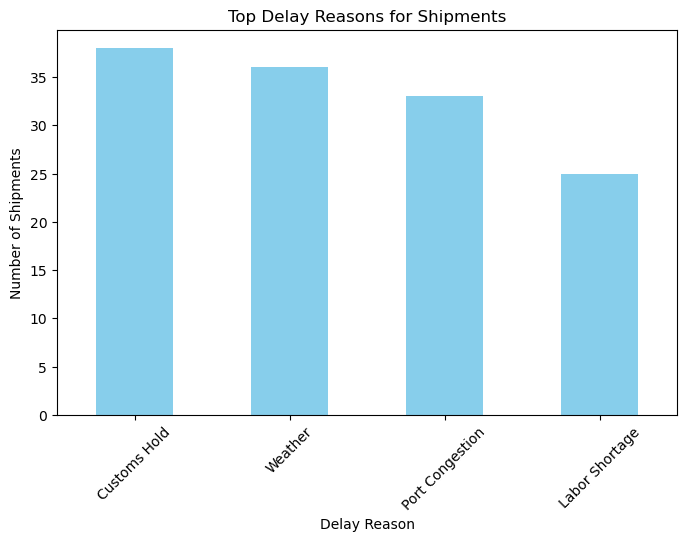

In [7]:
import matplotlib.pyplot as plt

# Plot delay reasons
delay_reasons.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Top Delay Reasons for Shipments')
plt.xlabel('Delay Reason')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.show()


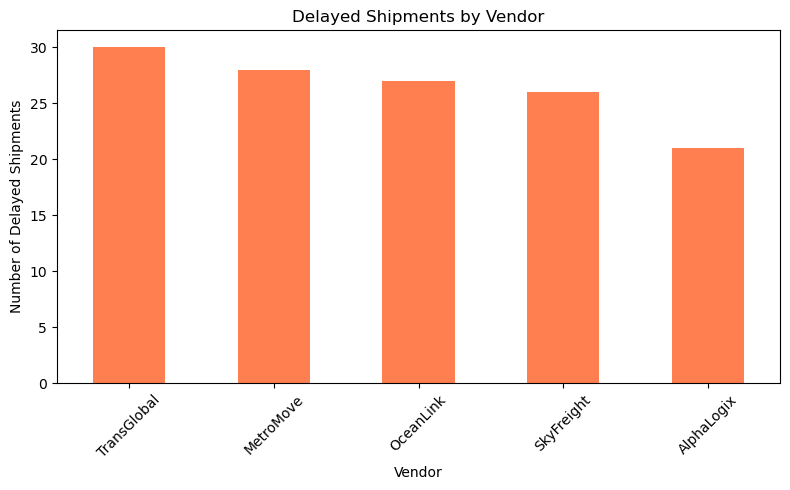

In [8]:
# Filter only delayed shipments
delayed_shipments = df[df['Delay_Flag'] == 'Yes']

# Count delays per vendor
vendor_delay_counts = delayed_shipments['Vendor_Name'].value_counts()

# Plot it
vendor_delay_counts.plot(kind='bar', color='coral', figsize=(8,5))
plt.title('Delayed Shipments by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Number of Delayed Shipments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


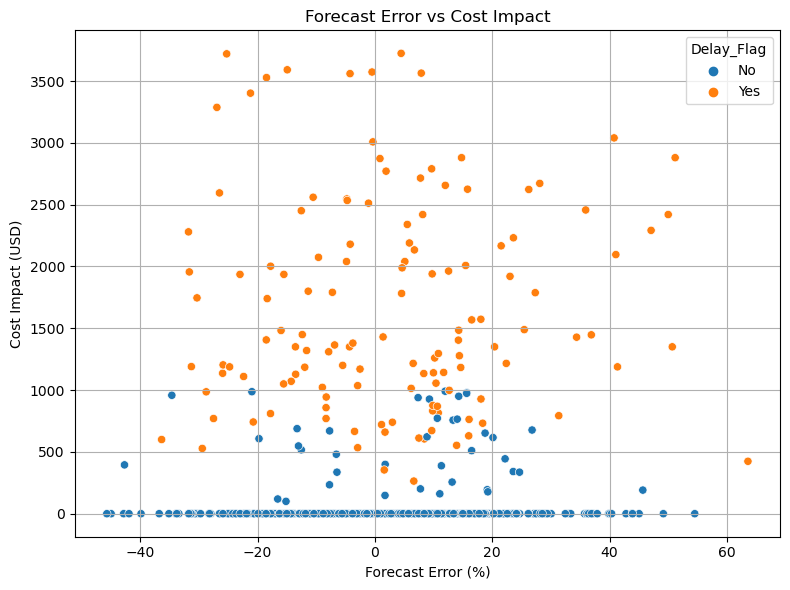

In [9]:
import seaborn as sns

# Scatter plot for Forecast Error vs Cost Impact
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Forecast_Error_Percent', y='Cost_Impact_USD', hue='Delay_Flag')
plt.title('Forecast Error vs Cost Impact')
plt.xlabel('Forecast Error (%)')
plt.ylabel('Cost Impact (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


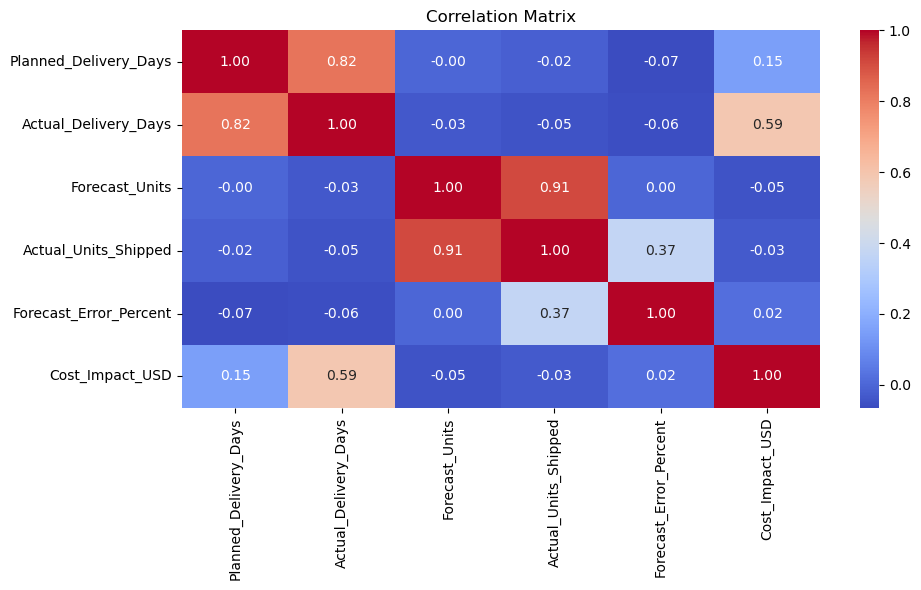

In [10]:
# Correlation matrix for numerical features
corr = df[['Planned_Delivery_Days', 'Actual_Delivery_Days', 'Forecast_Units', 'Actual_Units_Shipped', 'Forecast_Error_Percent', 'Cost_Impact_USD']].corr()

# Heatmap for visualization
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [11]:
# Grouping by Vendor to check delay count and average cost impact
vendor_performance = df.groupby('Vendor_Name').agg({
    'Delay_Flag': lambda x: (x == 'Yes').sum(),
    'Cost_Impact_USD': 'mean',
    'Shipment_ID': 'count'
}).rename(columns={
    'Delay_Flag': 'Total_Delays',
    'Cost_Impact_USD': 'Avg_Cost_Impact',
    'Shipment_ID': 'Total_Shipments'
}).sort_values(by='Total_Delays', ascending=False)

# Show results
vendor_performance


,Total_Delays,Avg_Cost_Impact,Total_Shipments
Vendor_Name,,,
TransGlobal,30,511.479167,96
MetroMove,28,556.605769,104
OceanLink,27,455.038462,104
SkyFreight,26,442.480769,104
AlphaLogix,21,443.630435,92


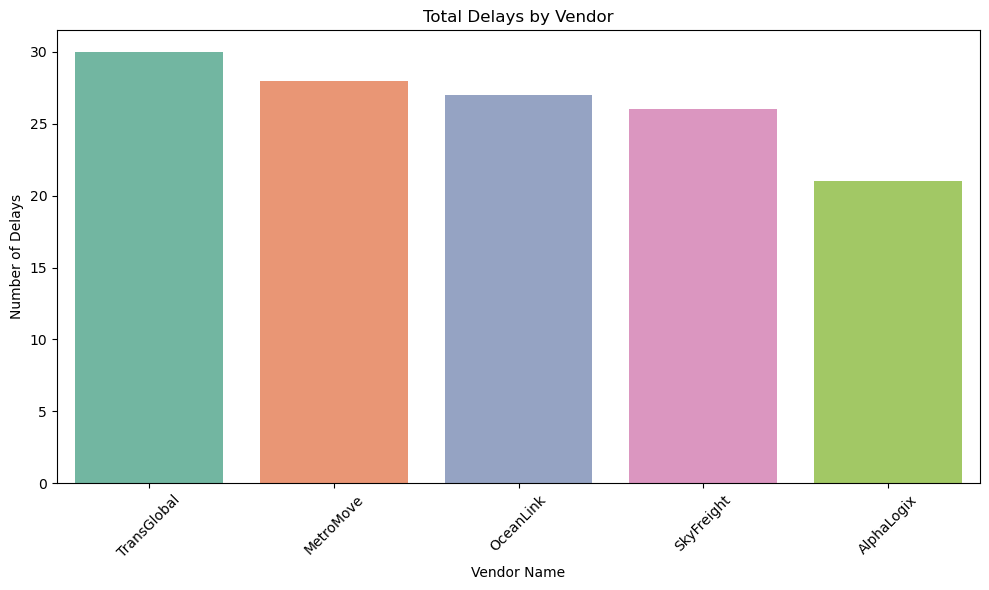

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Total Delays by Vendor
plt.figure(figsize=(10,6))
sns.barplot(
    x=vendor_performance.index,
    y=vendor_performance['Total_Delays'],
    palette='Set2'
)
plt.title('Total Delays by Vendor')
plt.xlabel('Vendor Name')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


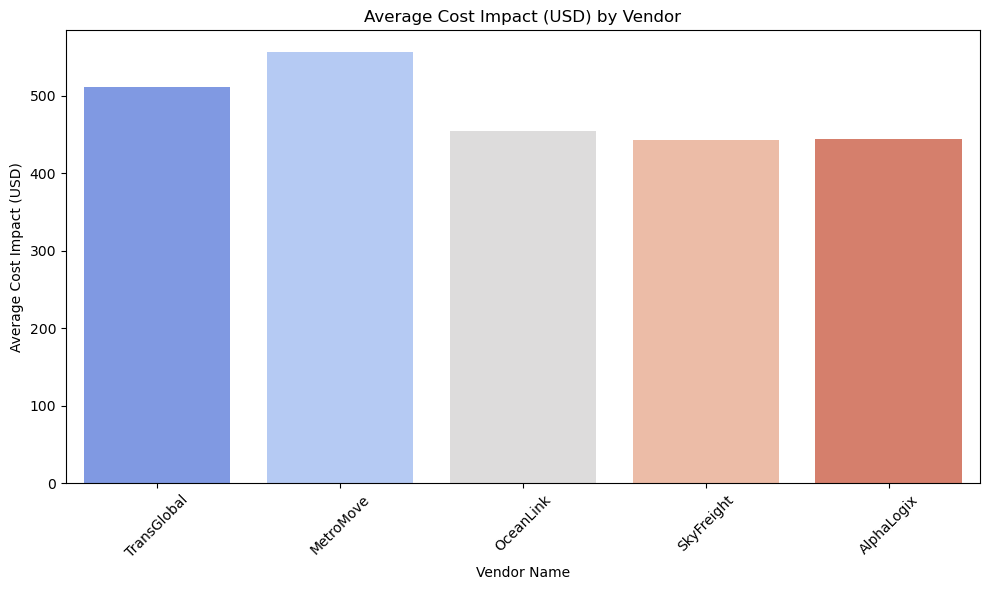

In [13]:
# Plot average cost impact by vendor
plt.figure(figsize=(10,6))
sns.barplot(
    x=vendor_performance.index,
    y=vendor_performance['Avg_Cost_Impact'],
    palette='coolwarm'
)
plt.title('Average Cost Impact (USD) by Vendor')
plt.xlabel('Vendor Name')
plt.ylabel('Average Cost Impact (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


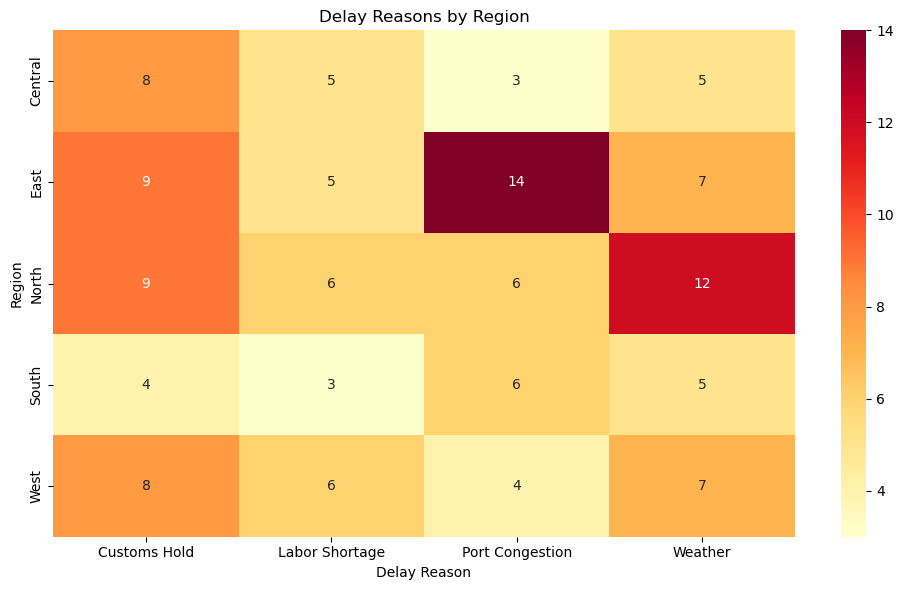

In [14]:
# Group delay reasons by region
delay_by_region = df[df['Delay_Flag'] == 'Yes'].groupby(['Region', 'Delay_Reason']).size().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(delay_by_region, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Delay Reasons by Region')
plt.xlabel('Delay Reason')
plt.ylabel('Region')
plt.tight_layout()
plt.show()



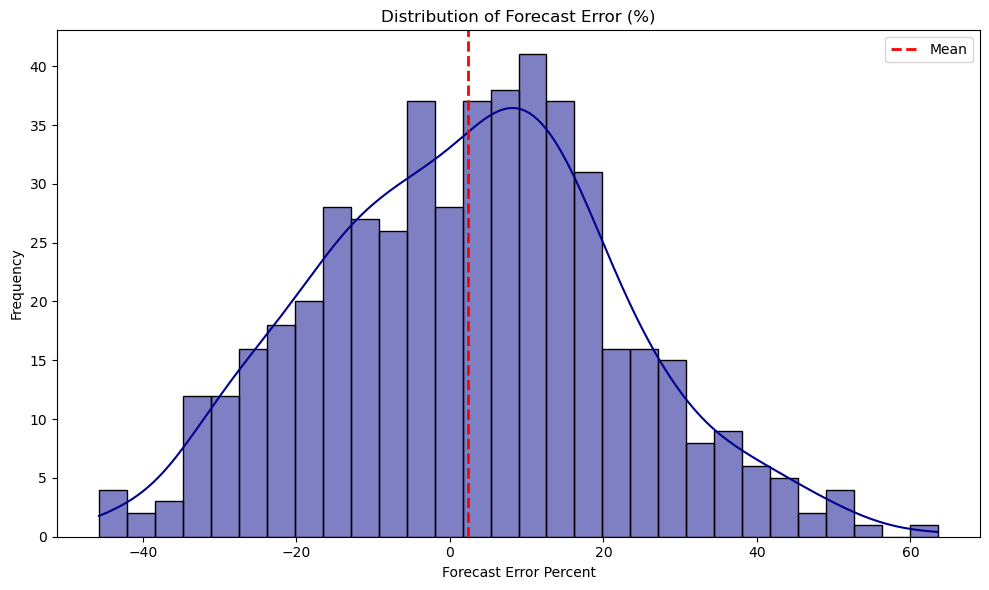

In [15]:
# Plot distribution of Forecast Error Percent
plt.figure(figsize=(10,6))
sns.histplot(df['Forecast_Error_Percent'], bins=30, kde=True, color='darkblue')
plt.title('Distribution of Forecast Error (%)')
plt.xlabel('Forecast Error Percent')
plt.ylabel('Frequency')
plt.axvline(df['Forecast_Error_Percent'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.tight_layout()
plt.show()



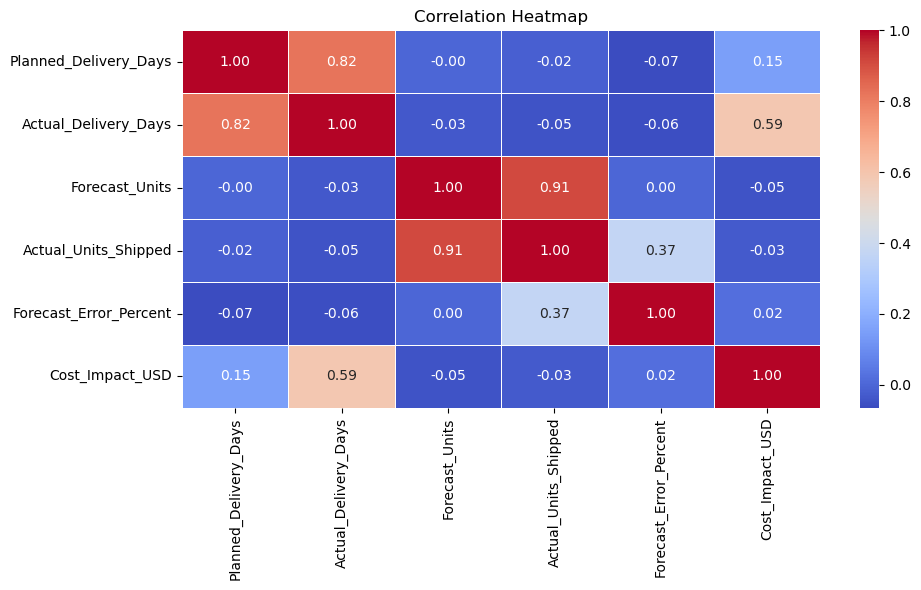

In [16]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
numerical_cols = ['Planned_Delivery_Days', 'Actual_Delivery_Days', 'Forecast_Units', 
                  'Actual_Units_Shipped', 'Forecast_Error_Percent', 'Cost_Impact_USD']

corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


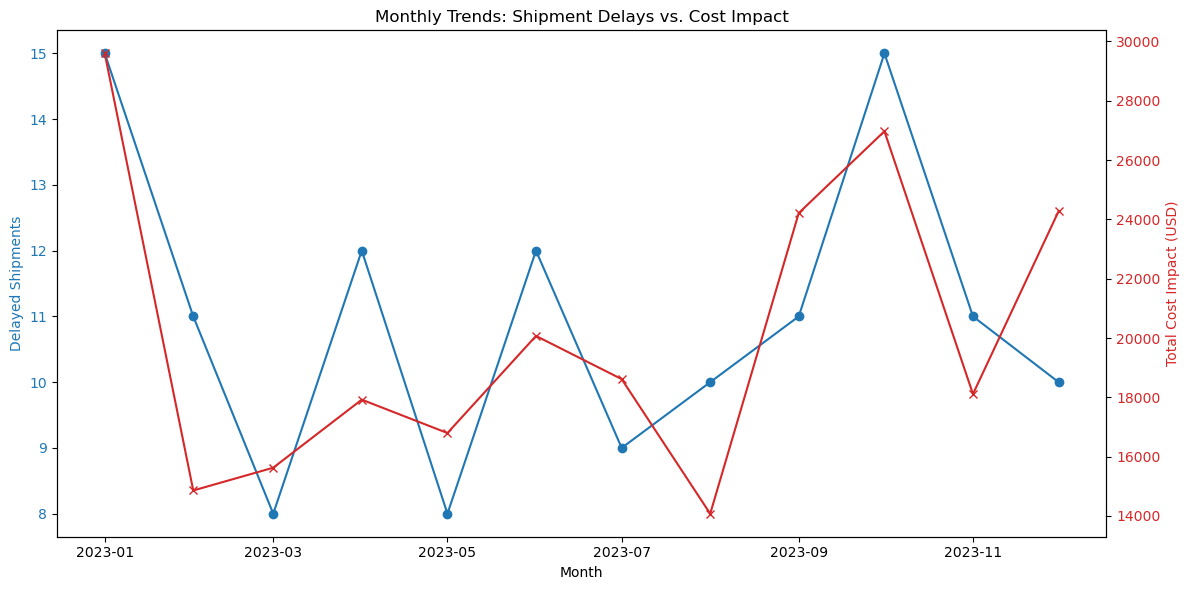

In [17]:
# Grouping by month to analyze trends
df['Month'] = df['Date'].dt.to_period('M')

monthly_summary = df.groupby('Month').agg({
    'Delay_Flag': lambda x: (x == 'Yes').sum(),
    'Cost_Impact_USD': 'sum'
}).reset_index()

# Convert 'Month' back to datetime for plotting
monthly_summary['Month'] = monthly_summary['Month'].dt.to_timestamp()

# Plotting trends
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Delayed Shipments', color=color)
ax1.plot(monthly_summary['Month'], monthly_summary['Delay_Flag'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Cost Impact (USD)', color=color)
ax2.plot(monthly_summary['Month'], monthly_summary['Cost_Impact_USD'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Trends: Shipment Delays vs. Cost Impact')
plt.tight_layout()
plt.show()


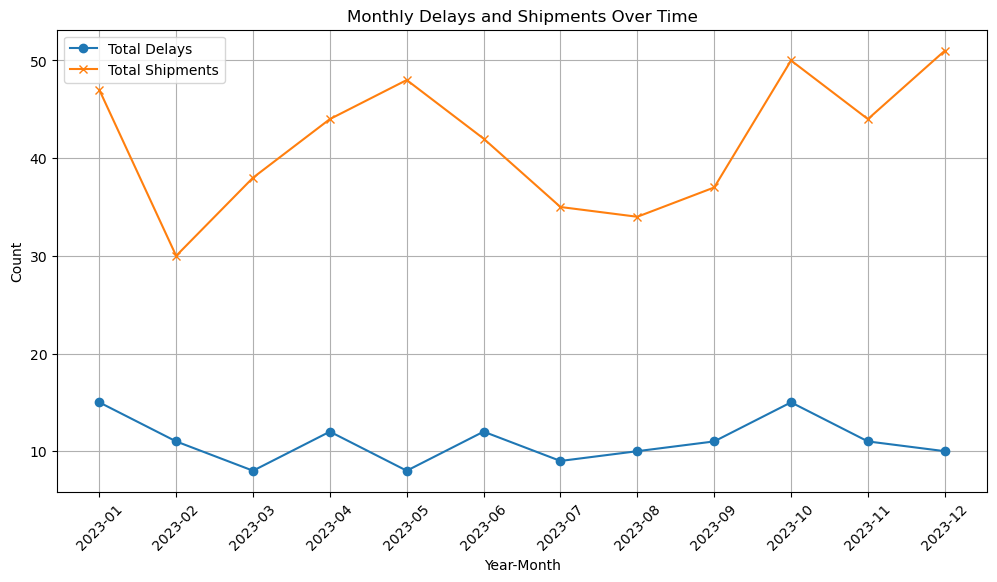

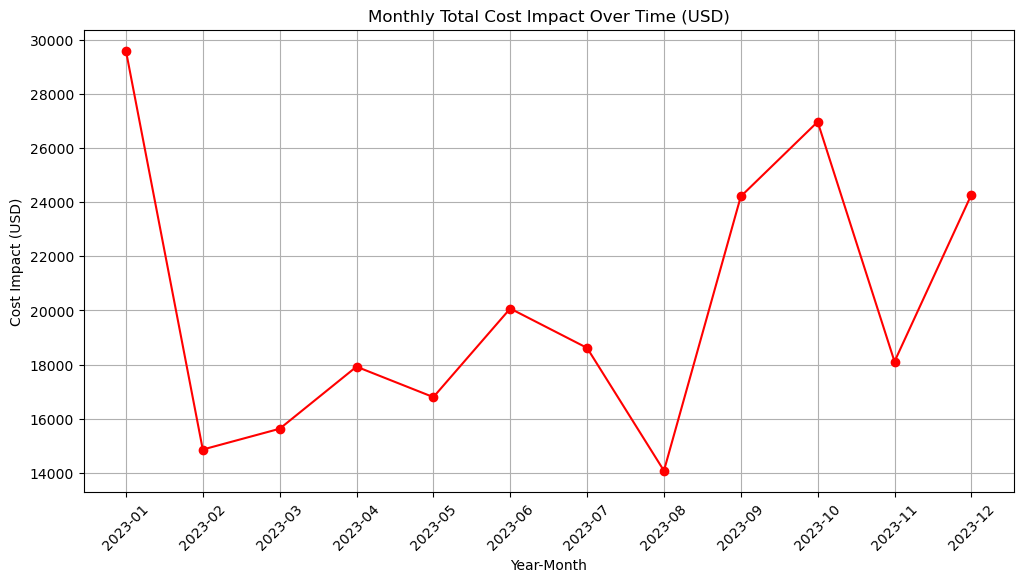

In [18]:
# Make sure 'Date' is datetime type (we already converted, but let's be sure)
df['Date'] = pd.to_datetime(df['Date'])

# Create a Year-Month column for grouping
df['YearMonth'] = df['Date'].dt.to_period('M')

# Aggregate data by YearMonth
monthly_summary = df.groupby('YearMonth').agg({
    'Delay_Flag': lambda x: (x == 'Yes').sum(),  # Count delays per month
    'Cost_Impact_USD': 'sum',                    # Total cost impact per month
    'Shipment_ID': 'count'                       # Total shipments per month
}).reset_index()

# Rename columns for clarity
monthly_summary.columns = ['YearMonth', 'Total_Delays', 'Total_Cost_Impact', 'Total_Shipments']

# Convert YearMonth back to string for plotting
monthly_summary['YearMonth'] = monthly_summary['YearMonth'].astype(str)

# Plot delays over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_summary['YearMonth'], monthly_summary['Total_Delays'], marker='o', label='Total Delays')
plt.plot(monthly_summary['YearMonth'], monthly_summary['Total_Shipments'], marker='x', label='Total Shipments')
plt.xticks(rotation=45)
plt.title('Monthly Delays and Shipments Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Plot cost impact over time separately
plt.figure(figsize=(12,6))
plt.plot(monthly_summary['YearMonth'], monthly_summary['Total_Cost_Impact'], color='red', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Total Cost Impact Over Time (USD)')
plt.xlabel('Year-Month')
plt.ylabel('Cost Impact (USD)')
plt.grid(True)
plt.show()


In [19]:
# Aggregate delays and cost impact by Vendor
vendor_summary = df.groupby('Vendor_Name').agg({
    'Delay_Flag': lambda x: (x == 'Yes').sum(),
    'Cost_Impact_USD': 'sum',
    'Shipment_ID': 'count'
}).reset_index()
vendor_summary.columns = ['Vendor_Name', 'Total_Delays', 'Total_Cost_Impact', 'Total_Shipments']

# Sort by total delays descending
vendor_summary = vendor_summary.sort_values(by='Total_Delays', ascending=False)

# Aggregate delays and cost impact by Region
region_summary = df.groupby('Region').agg({
    'Delay_Flag': lambda x: (x == 'Yes').sum(),
    'Cost_Impact_USD': 'sum',
    'Shipment_ID': 'count'
}).reset_index()
region_summary.columns = ['Region', 'Total_Delays', 'Total_Cost_Impact', 'Total_Shipments']

region_summary = region_summary.sort_values(by='Total_Delays', ascending=False)

# Aggregate delays and cost impact by Product Category
product_summary = df.groupby('Product_Category').agg({
    'Delay_Flag': lambda x: (x == 'Yes').sum(),
    'Cost_Impact_USD': 'sum',
    'Shipment_ID': 'count'
}).reset_index()
product_summary.columns = ['Product_Category', 'Total_Delays', 'Total_Cost_Impact', 'Total_Shipments']

product_summary = product_summary.sort_values(by='Total_Delays', ascending=False)

# Show top 5 vendors with most delays
print("Top 5 Vendors with Most Delays:")
print(vendor_summary.head())

# Show top 5 regions with most delays
print("\nTop 5 Regions with Most Delays:")
print(region_summary.head())

# Show top 5 product categories with most delays
print("\nTop 5 Product Categories with Most Delays:")
print(product_summary.head())


Top 5 Vendors with Most Delays:
   Vendor_Name  Total_Delays  Total_Cost_Impact  Total_Shipments
4  TransGlobal            30              49102               96
1    MetroMove            28              57887              104
2    OceanLink            27              47324              104
3   SkyFreight            26              46018              104
0   AlphaLogix            21              40814               92

Top 5 Regions with Most Delays:
    Region  Total_Delays  Total_Cost_Impact  Total_Shipments
1     East            35              68492              119
2    North            33              57415              102
4     West            25              46158               92
0  Central            21              36879               89
3    South            18              32201               98

Top 5 Product Categories with Most Delays:
  Product_Category  Total_Delays  Total_Cost_Impact  Total_Shipments
3        Furniture            34              58622              1

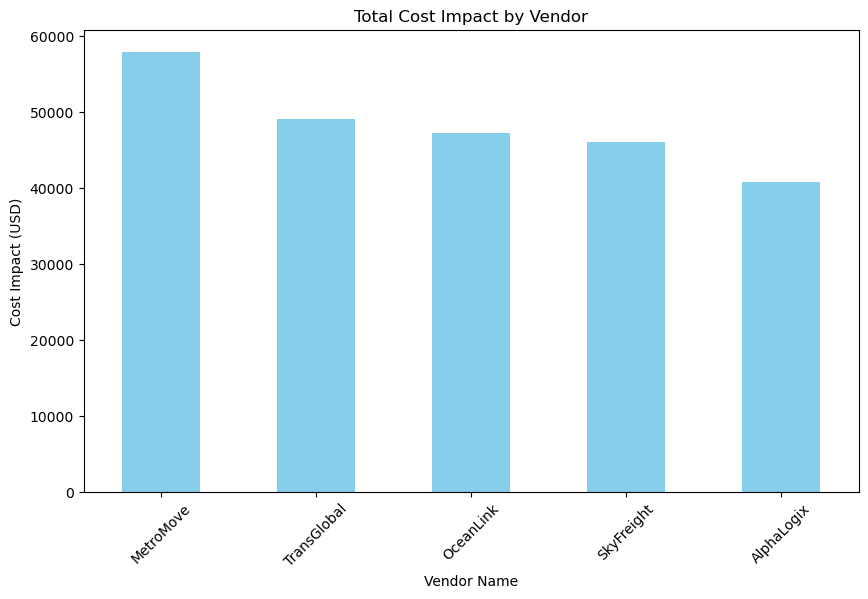

In [20]:
import matplotlib.pyplot as plt

# Group by Vendor_Name and sum the Cost_Impact_USD
vendor_cost = df.groupby('Vendor_Name')['Cost_Impact_USD'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10,6))
vendor_cost.plot(kind='bar', color='skyblue')
plt.title('Total Cost Impact by Vendor')
plt.xlabel('Vendor Name')
plt.ylabel('Cost Impact (USD)')
plt.xticks(rotation=45)
plt.show()


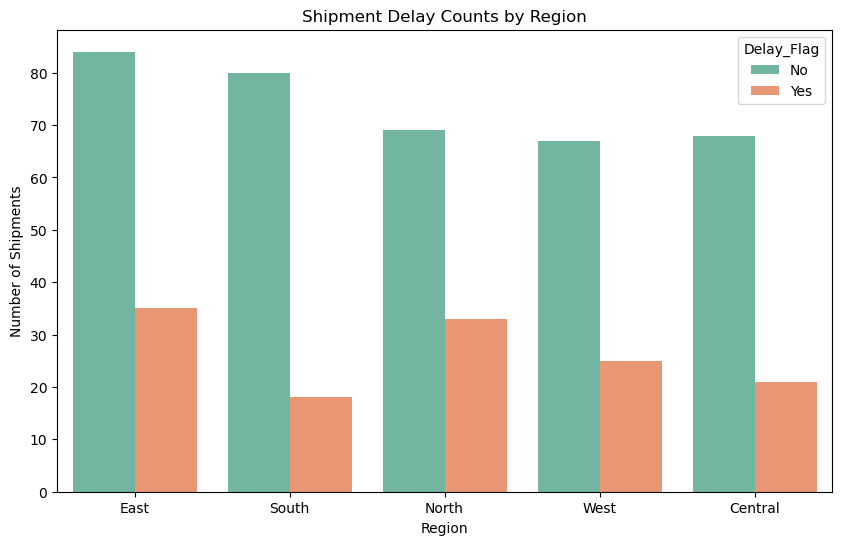

In [21]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Region', hue='Delay_Flag', palette='Set2')
plt.title('Shipment Delay Counts by Region')
plt.xlabel('Region')
plt.ylabel('Number of Shipments')
plt.show()


C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_5348\1610147941.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


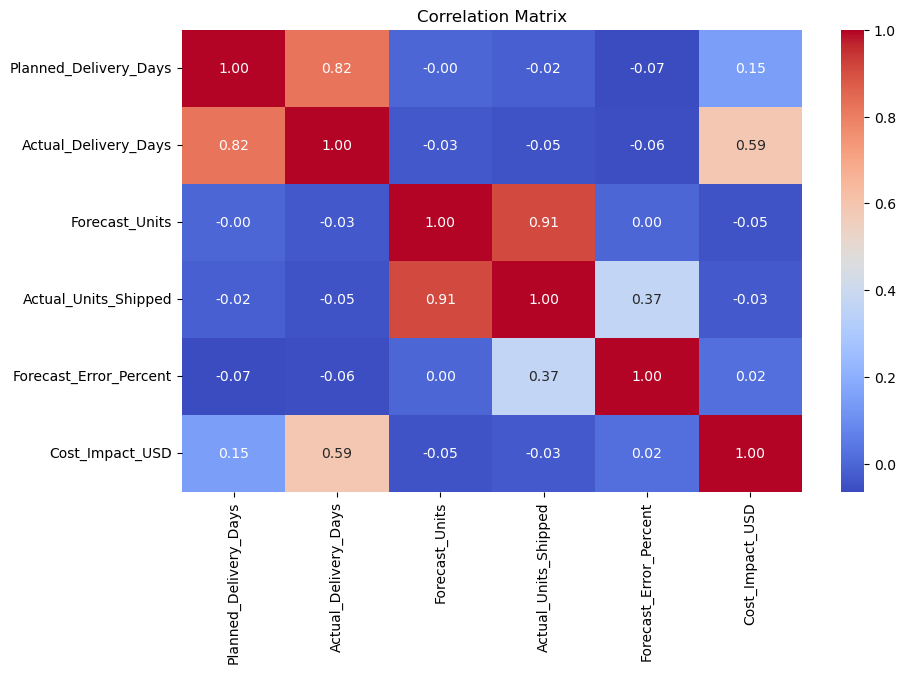

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



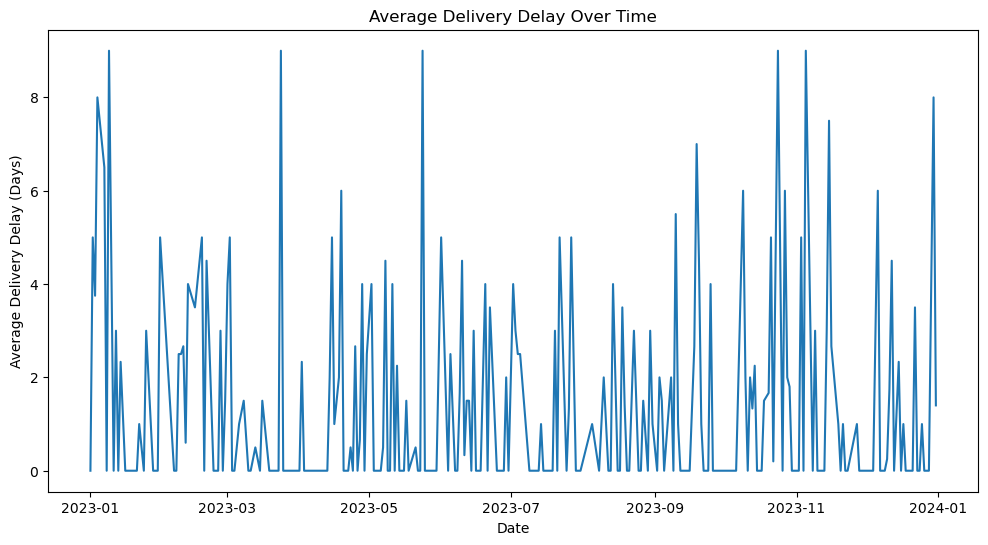

In [23]:
# Create Delivery_Delay column
df['Delivery_Delay'] = df['Actual_Delivery_Days'] - df['Planned_Delivery_Days']

# Group by Date and calculate average delay per day
daily_delay = df.groupby('Date')['Delivery_Delay'].mean().reset_index()

# Plot average delivery delay over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_delay, x='Date', y='Delivery_Delay')
plt.title('Average Delivery Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Average Delivery Delay (Days)')
plt.show()


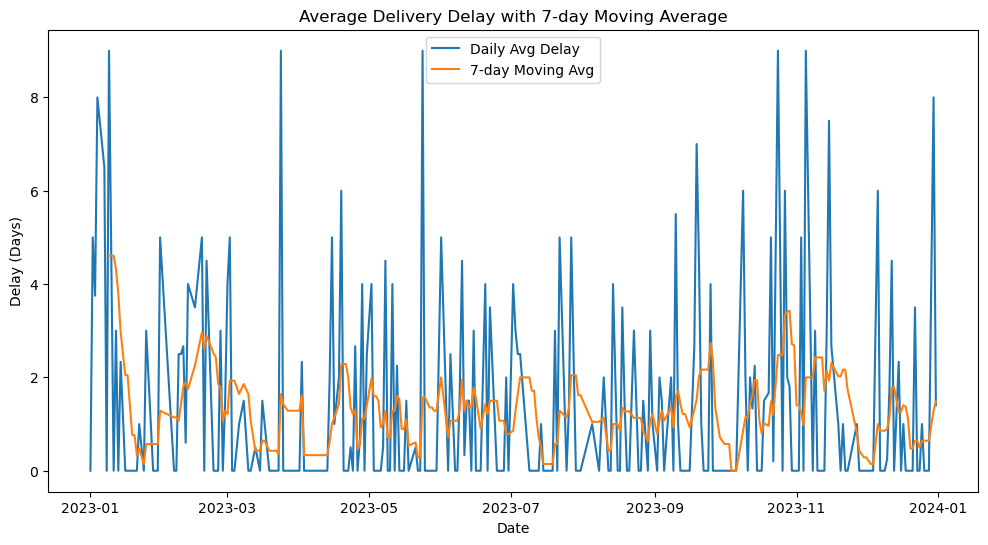

In [24]:
# Calculate 7-day moving average of delivery delay
daily_delay['Moving_Avg_Delay'] = daily_delay['Delivery_Delay'].rolling(window=7).mean()

# Plot moving average
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_delay, x='Date', y='Delivery_Delay', label='Daily Avg Delay')
sns.lineplot(data=daily_delay, x='Date', y='Moving_Avg_Delay', label='7-day Moving Avg')
plt.title('Average Delivery Delay with 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Delay (Days)')
plt.legend()
plt.show()


In [26]:
# Summary and Insights

# Calculate overall average delay and latest 7-day moving average delay
overall_avg_delay = daily_delay['Delivery_Delay'].mean()
latest_moving_avg_delay = daily_delay['Moving_Avg_Delay'].iloc[-1]

print("=== Supply Chain Delivery Delay Summary ===")
print(f"Overall Average Delivery Delay: {overall_avg_delay:.2f} days")
print(f"Most Recent 7-day Moving Average Delay: {latest_moving_avg_delay:.2f} days\n")

if latest_moving_avg_delay > overall_avg_delay:
    print("Insight: Delivery delays have shown an increasing trend recently.")
else:
    print("Insight: Delivery delays have improved recently compared to the overall average.")

print("\nRecommendation:")
print("Investigate recent factors causing delays and optimize vendor or route management to reduce delivery times.")


=== Supply Chain Delivery Delay Summary ===
Overall Average Delivery Delay: 1.37 days
Most Recent 7-day Moving Average Delay: 1.49 days

Insight: Delivery delays have shown an increasing trend recently.

Recommendation:
Investigate recent factors causing delays and optimize vendor or route management to reduce delivery times.
